# Chapter 43: Python Data Science Handbook  
## Face Recognition with PCA and SVC using Grid Search  

### Overview  
Grid search systematically explores all combinations of specified hyperparameters using cross-validation to select the best performing configuration for the SVC classifier.

---

### Pipeline Setup  
- **PCA**: Used for dimensionality reduction to reduce the feature space.  
- **SVC**: Used for classification to improve performance.  

---

### Parameter Grid Definition  
- **C**: Controls the regularization strength of the SVC.  
- **Gamma**: Controls the kernel coefficient for the 'rbf' kernel.  
- A grid of hyperparameters is defined to explore the best combination.  

---

### Grid Search Initialization  
- **GridSearchCV**: Initialized with the pipeline and parameter grid.  
- Performs exhaustive search over the specified hyperparameter values.  

---

### Model Training and Search  
- The grid search object is fitted to the training data.  
- Runs the pipeline for every combination of `C` and `gamma` in the parameter grid.  
- Cross-validation is performed for each combination to estimate performance.  

---

### Best Parameters Selection  
- After fitting, the best parameters are selected based on cross-validation scores.  
- The pipeline is updated to use the best configuration.  

---

### Prediction and Evaluation  
- The optimized model is used for face recognition predictions.  
- Evaluation metrics like **classification report** and **confusion matrix** provide insights into model performance.  

---

### Visualization  
- Predicted labels are displayed with incorrect labels highlighted in red.  
- Confusion matrix heatmap provides insights into misclassification patterns.  



['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


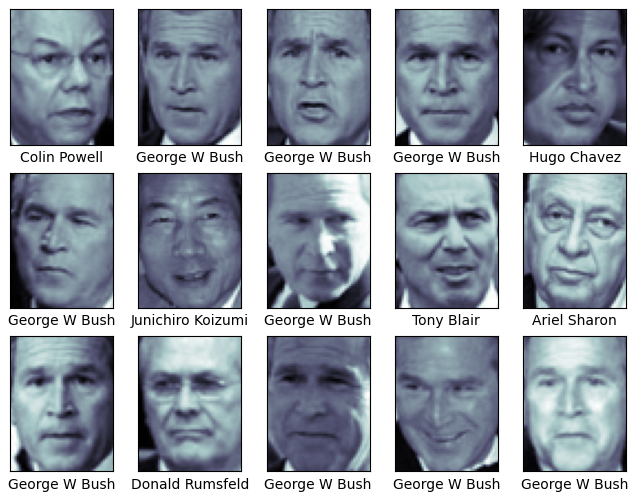

In [10]:



import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

fig, ax = plt.subplots(3, 5, figsize=(8, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
    xlabel=faces.target_names[faces.target[i]])

/opt/anaconda3/envs/llama-env/lib/python3.13/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A @ Q)
/opt/anaconda3/envs/llama-env/lib/python3.13/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A @ Q)
/opt/anaconda3/envs/llama-env/lib/python3.13/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning: invalid value encountered in matmul
  Q, _ = normalizer(A @ Q)
/opt/anaconda3/envs/llama-env/lib/python3.13/site-packages/sklearn/utils/extmath.py:336: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/opt/anaconda3/envs/llama-env/lib/python3.13/site-packages/sklearn/utils/extmath.py:336: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/opt/anaconda3/envs/llama-env/lib/python3.13/site-packages/sklearn/utils/extmath.py:336: RuntimeWarning: invalid value encountered in matmul
  Q, _ = normalizer(A.T

CPU times: user 6.1 s, sys: 541 ms, total: 6.65 s
Wall time: 6.32 s
{'svc__C': 5, 'svc__gamma': 0.001}
                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.83      0.88      0.86        68
  Donald Rumsfeld       0.70      0.84      0.76        31
    George W Bush       0.97      0.80      0.88       126
Gerhard Schroeder       0.76      0.83      0.79        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.98      0.89        42

         accuracy                           0.85       337
        macro avg       0.82      0.86      0.83       337
     weighted avg       0.86      0.85      0.85       337



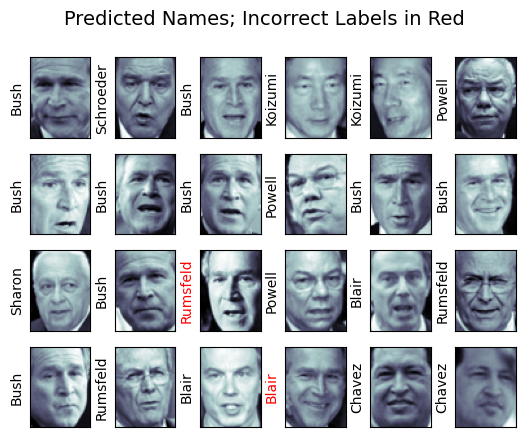

In [11]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
pca = PCA(n_components=150, whiten=True,
svd_solver='randomized', random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
random_state=42)
# Perform grid search cross-validation to find the best parameters for the model
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)
%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

#{'svc__C': 10, 'svc__gamma': 0.001}
# The optimal values fall toward the middle of our grid; if they fell at the edges, we
# would want to expand the grid to make sure we have found the true optimum.
model = grid.best_estimator_
yfit = model.predict(Xtest)

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
    color='black' if yfit[i] == ytest[i] else 'red')
    fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)
# Example: Face Recognition | 447
# Figure 43-12. Labels predicted by our model
# Out of this small sample, our optimal estimator mislabeled only a single face (Bush’s
# face in the bottom row was mislabeled as Blair). We can get a better sense of our esti‐
# mator’s performance using the classification report, which lists recovery statistics
# label by label:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
target_names=faces.target_names))


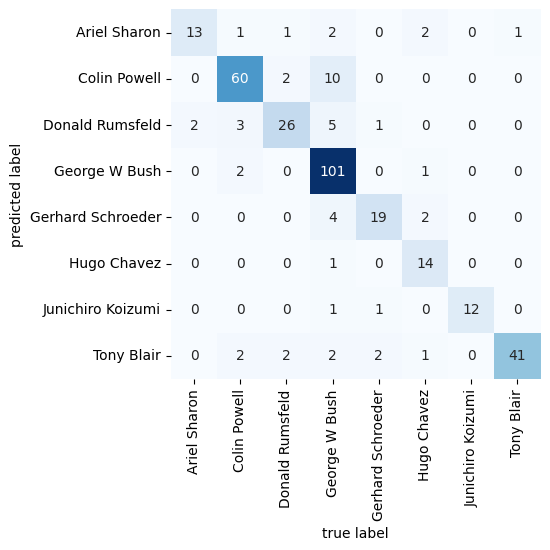

In [12]:
#Chapter 43: In Depth: Support Vector Machines
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d',
cbar=False, cmap='Blues',
xticklabels=faces.target_names,
yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');
# The confusion matrix provides insights into which labels are often misclassified.
# For real-world applications, consider using advanced feature extraction methods like OpenCV for better results.
